In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# relevant constants

x = 0.1  # point we will expand about
h = 1  #largest "infinitesimal"
y_analytic = np.cos(x)  # expected analytic value
h_steps_arr = np.linspace(0.001, h, 100)  # array of h's 

# defining the derivative functions

# flavour 1 #
def deriv1(f, x0, h):
    return (f(x0+h)-f(x0))/h

# flavour 2 #
def deriv2(f, x0, h):
    return (f(x0+h)-f(x0-h))/(2*h)

# error calculator helper #
def compare2derivs(analytic, numerical):
    return (numerical-analytic)/analytic

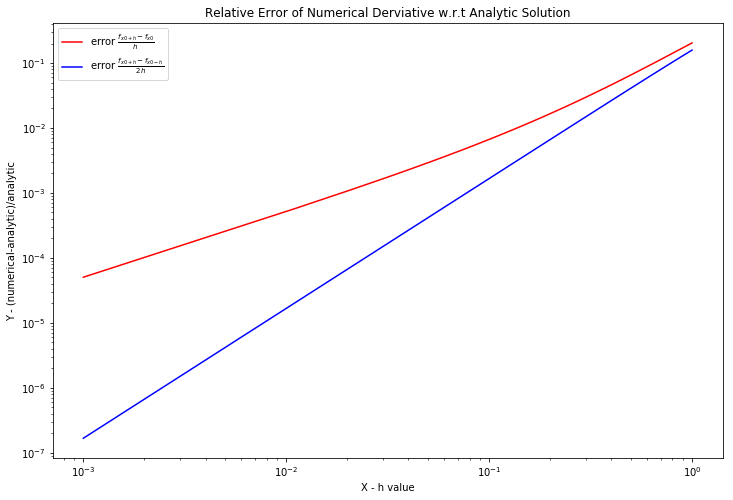

In [12]:
# graphing the log log of the errors
# (messy... I know)
plt.figure(figsize=(12,8))
plt.title("Relative Error of Numerical Derviative w.r.t Analytic Solution")
plt.loglog(h_steps_arr ,np.abs(deriv1(np.sin, x, h_steps_arr)-y_analytic)/y_analytic, c = 'red', label = r"error $\frac{f_{x0+h}-f_{x0}}{h}$")
plt.loglog(h_steps_arr ,np.abs(deriv2(np.sin, x, h_steps_arr)-y_analytic)/y_analytic, c = 'blue', label = r"error $\frac{f_{x0+h}-f_{x0-h}}{2h}$")
plt.ylabel("Y - (numerical-analytic)/analytic")
plt.xlabel("X - h value")
plt.legend()
plt.savefig("deriv_error.pdf")
plt.show()

In [9]:
# A very brute force approach to distinguishing between
# overflows and convergent indecies. But I gain speed using np instead
# of iterating element-wise. (I just let the elements overflow)

resolution = 1000
extent = 2
extent_array = [-extent, extent, -extent, extent]
plane_extent = np.linspace(-extent, extent, resolution)
R, C = np.meshgrid(plane_extent, plane_extent)
z = R+1j*C
z0 = np.zeros_like(z)
z_iter = z

for i in range(1000):
    z0 = z0**2+z
    
hit_map = np.isnan(z0)

z0[hit_map] = 0
z0[np.logical_not(hit_map)] = 100
# z = np.nan_to_num(z)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in square
  from ipykernel import kernelapp as app


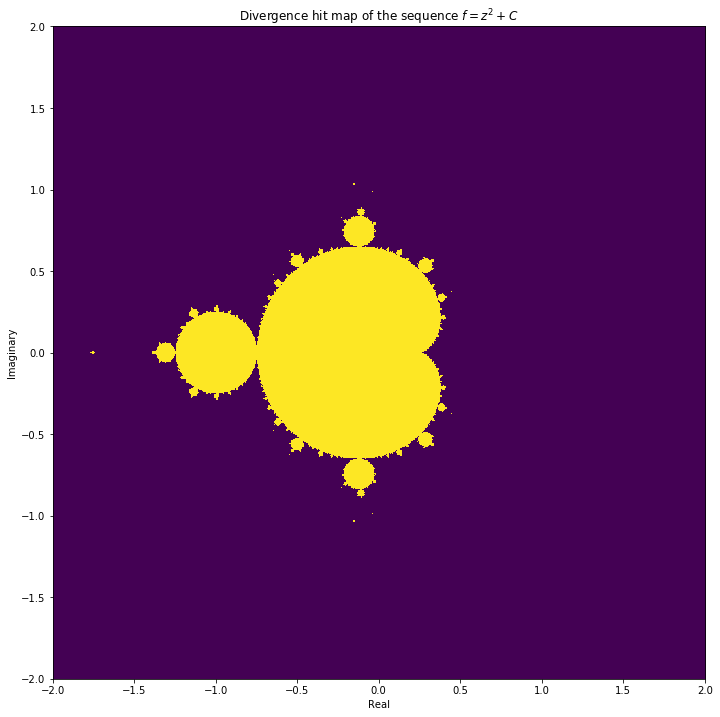

In [18]:
plt.figure(figsize=(12,12))
plt.title("Divergence hit map of the sequence $f = z^{2} + C$")
plt.ylabel("Imaginary")
plt.xlabel("Real")
plt.imshow(abs(z0), extent = extent_array)
plt.savefig("complex_pattern.pdf")


In [6]:
# IMPLEMENTATION OF SIR MODEL #

from scipy.integrate import ode

def SIR_model(t, y, N, beta, gamma):
    """
    Function for the damped harmonic oscillator.
    
    Parameters:
    t: Time
    y: Array of [R, S, I]
    beta: mass
    gamma: damping coefficient
    N: population size
    """
    S, I, R = y
    
    return [-beta*(S/N)*I, (beta*S*I)/N- gamma*I, gamma*I]

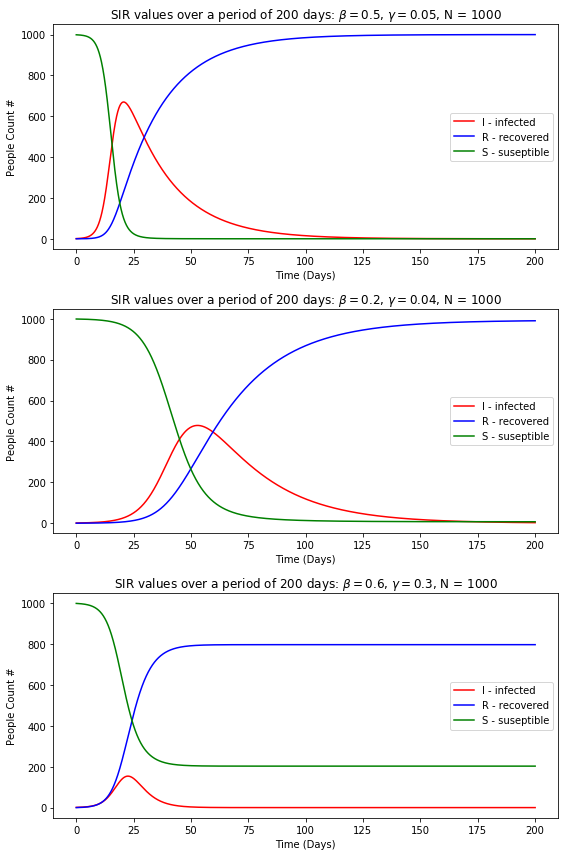

In [69]:
# initial conditions of SIR model
y0 = [999.0, 1.0, 0.0 ]  # I0 = 1 | S0 = 999 | R0 = 0
t0 = 0.0

# Choose m, c, k
# relevant variable definitions
N = 1000  # pop size
t_end = 200  # max time for intergation
t0 = 0  # beginning of time series 
beta = 0.5 # parameter beta
gamma = 0.05  # parameter gamma

# time step
dt = 0.1



# first set ######################################
# Array to store the results
times = [t0]
res = [y0]

solver = ode(SIR_model).set_integrator('dopri5').set_initial_value(y0, t0).set_f_params(N, beta, gamma)

# Solve the equation
while solver.successful() and solver.t < t_end:
    times.append(solver.t + dt)
    res.append(solver.integrate(solver.t + dt))
    
s, i, r = np.array(res).T
times = np.array(times)


# second set ###################################

# Array to store the results
beta = 0.2
gamma = 0.04
times1 = [t0]
res1 = [y0]

solver = ode(SIR_model).set_integrator('dopri5').set_initial_value(y0, t0).set_f_params(N, beta, gamma)

# Solve the equation
while solver.successful() and solver.t < t_end:
    times1.append(solver.t + dt)
    res1.append(solver.integrate(solver.t + dt))
    
s1, i1, r1 = np.array(res1).T

##################################################



# third set ######################################

# Array to store the results
beta = 0.6
gamma = 0.3
times2 = [t0]
res2 = [y0]

solver = ode(SIR_model).set_integrator('dopri5').set_initial_value(y0, t0).set_f_params(N, beta, gamma)

# Solve the equation
while solver.successful() and solver.t < t_end:
    times2.append(solver.t + dt)
    res2.append(solver.integrate(solver.t + dt))
    
s2, i2, r2 = np.array(res2).T

##################################################




# plot the results along with the analytic solution
plt.figure(figsize=(8,12))

plt.subplot(311)
plt.title(r"SIR values over a period of 200 days: $\beta = 0.5$, $\gamma = 0.05$, N = 1000")
plt.ylabel("People Count #")
plt.xlabel("Time (Days)")
plt.plot(times,i, 'r', label = "I - infected")
plt.plot(times,r, 'b', label = "R - recovered")
plt.plot(times,s, 'g', label = "S - suseptible")
plt.legend()

plt.subplot(312)
plt.title(r"SIR values over a period of 200 days: $\beta = 0.2$, $\gamma = 0.04$, N = 1000")
plt.ylabel("People Count #")
plt.xlabel("Time (Days)")
plt.plot(times,i1, 'r', label = "I - infected")
plt.plot(times,r1, 'b', label = "R - recovered")
plt.plot(times,s1, 'g', label = "S - suseptible")
plt.legend()

plt.subplot(313)
plt.title(r"SIR values over a period of 200 days: $\beta = 0.6$, $\gamma = 0.3$, N = 1000")
plt.ylabel("People Count #")
plt.xlabel("Time (Days)")
plt.plot(times,i2, 'r', label = "I - infected")
plt.plot(times,r2, 'b', label = "R - recovered")
plt.plot(times,s2, 'g', label = "S - suseptible")
plt.legend()
plt.tight_layout()
plt.savefig("SIR_model.pdf")
plt.show()